# **Project Name**    -  AirBnb Bookings Analysis.



#### **Project Type**    - EDA
#### **Contribution**    - Individual

# **Project Summary -**

###Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
###This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.



# **Business Objective**

##Explore and analyse the data to discover key understandings.

# ***Let's Begin !***

## ***1. Knowing Data***

### Importing Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Loading Dataset
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Copy of Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
df.head()

In [ ]:
df['availability_365'].mean()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

This shows there is no any duplicated row in dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

### How much I know about my dataset?

This dataset consist of 48895 rows and total 16 columns. Column 'last_review' and 'reviews_per_month ' consist maximum number of Null values which are 10052 in number. This shows that customer avoid to offer there review or forgot to offer review. 
'Latitude' and 'Longitude' columns shows the geospatial location of specific property which is enlisted in Airbnb dataset. In this most amazing thing is that there is no any null values in these columns means using GPS tool we can reach to these properties.

## ***2. Understanding Dataset Variables***

In [ ]:
# Dataset Columns
df.columns.tolist()

In [ ]:
# Dataset Describe
df.describe()


### Variables Description 

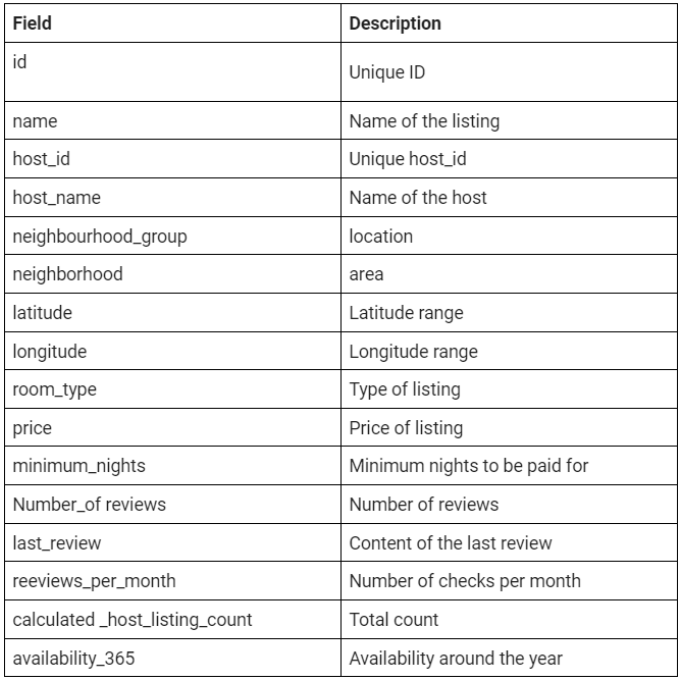

## 3. ***Data Wrangling***

### Data Wrangling Code

### 1. Number of rooms according to there types

In [ ]:
room_types=df.groupby('room_type',as_index=False)['name'].count()
room_types

### 2.Room type and there mean prices

In [ ]:
df.groupby('room_type',as_index=False)['price'].mean()

###3. Number of rooms in different neighbourhood groups.

In [ ]:
df.groupby(['neighbourhood_group'],as_index=False)['name'].count()

###4.Mean prices of all rooms in different neighbourhood groups.

In [ ]:
df.groupby(['neighbourhood_group'],as_index=False)['price'].mean()

###5.Top 10 Neighbourhood according to number of properties.

In [ ]:
w=df.groupby(['neighbourhood'],as_index=False).count()
w=w.sort_values('id',ascending=False)
w=w[['neighbourhood','id']].head(10)
w

###6. Top 10 expensive neighbourhood according to mean price.

In [ ]:
pricewise_neighbourhood=df.groupby('neighbourhood',as_index=False)['price'].mean()

top_10_expensive_neighbourhood=pricewise_neighbourhood.sort_values('price',ascending=False).head(10)
top_10_expensive_neighbourhood


###Last 10 neighbourhood according to mean price

In [ ]:
top_10_cheaper_neighbourhood= pricewise_neighbourhood.sort_values('price').head(10)
top_10_cheaper_neighbourhood

###Number of different types of rooms in different neighbourhood_group.

In [ ]:
df.groupby(['neighbourhood_group','room_type'],as_index=False)['name'].count()

### Mean Price of different types of rooms in different neighbourhood groups.

In [ ]:
df.groupby(['neighbourhood_group','room_type'],as_index=False)['price'].mean()

### Mean price for different room type.

In [ ]:
df.groupby('room_type',as_index=False)['price'].mean()

###Mean Room Avilability in different neighbourhood group

In [ ]:
df.groupby(['neighbourhood_group','room_type'],as_index=False)['availability_365'].mean()    #['availability_365'].count()


### Room type Vs. Room Avilability

In [ ]:
a=df.groupby('room_type',as_index=False)['availability_365'].mean()
a

In [ ]:
plt.pie(a["availability_365"],labels=a["room_type"],autopct='%0.2f%%')

###Neighbourhood Groups vs Number of Host

In [ ]:
bg=df.groupby('neighbourhood_group',as_index=False)['host_id'].count()
bg

In [ ]:
a=sns.barplot(x='neighbourhood_group',y='host_id',data=bg)

for i in a.containers:
  a.bar_label(i)

### Top 15 monthly reviewed properties along with there neighbourhood and room type.

In [ ]:
df_review= df.sort_values('reviews_per_month',ascending=False)
df_review=df_review[['neighbourhood_group','room_type','price','reviews_per_month','availability_365']]
df_review=df_review[df_review['reviews_per_month']>0]
df_review.head(15)


In [ ]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x=df_review['neighbourhood_group'],y=df_review['availability_365'],hue=df_review['room_type'])

for i in ax.containers:
  ax.bar_label(i)

### Neighbourhood Group vs Count of reviewed properties

In [ ]:
df_review.groupby('neighbourhood_group',as_index=False)['reviews_per_month'].count()


###Top 10 host as per number of property

In [ ]:
top_10_host =df.groupby('host_id',as_index=False).count()
top_10_host=top_10_host.sort_values('host_name',ascending=False).head(10)

top_10_host=top_10_host[['host_id','id']]
top_10_host

###Top 5 highest rivewed hosts and there Neighbourhood Group

In [ ]:
top_reviewed=df.sort_values('number_of_reviews',ascending=False)
top_reviewed=top_reviewed[['host_name','neighbourhood_group','room_type','price','number_of_reviews']]

###Number of different types of rooms in vaious Neighbourhood Groups 

In [ ]:
top_reviewed.groupby(["neighbourhood_group",'room_type'])['room_type'].count()

###Top 5 highest rivewed hosts and there Neighbourhood Group

In [ ]:
top_reviewed[['host_name','neighbourhood_group','number_of_reviews']].head(5)

### For Top Reviewed properties average price for different room types.

In [ ]:
top_reviewed.groupby(['room_type'])['price'].mean()

## ***4. Data Vizualization: Understand the relationships between variables***

### Chart - 1: Room Types Vs Count

In [ ]:
# Chart - 1 visualization code
room_types=df.groupby('room_type',as_index=False)['name'].count()
plt.pie(room_types["name"],labels=room_types["room_type"],autopct='%0.2f%%')
plt.title("No. of Rooms in every type",fontsize=15)


plt.show()

#### 1. Purpose behind choosing this chart:

Here I am using Pie plot for showing the relationship between various room types and there counts because pie plot provide better visulization in this context as compare to other charts. 

#### 2. Insights from this visualization:

Here we can see that count of Entire home apartment is highest than other which is 51.97% of total. While the share of Shared room is very small which is just 2.37%. From this we can see that only few owners put Shared room type property on AirBnb network.

### Chart - 2:Room type Vs Mean price.

In [ ]:
# Chart - 2 visualization code
a=df.groupby('room_type',as_index=False)['price'].mean()
plt.figure(figsize=(7,4))
ax=sns.barplot(x='room_type',y='price',data=a)

for i in ax.containers:
  ax.bar_label(i)
  
plt.title("Average Price of Room",fontsize=20)
plt.xlabel("Type of Room",fontsize=15)
plt.ylabel('Price',fontsize=15)

plt.show()

#### 1. Purpose behind choosing this chart:

Here the relation between room type vs mean price will be shown in proper way using Barplot only.

#### 2. Insights from this visualization:

From graph we can see that mean price of Entire home type property is highest while Shared room type is lowest. This might be due to area of Entire room is large and several other aminities also avilable in that as compare to others. 

### Chart - 3:Neighbourhood group vs Room count.

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(7,4))
m=df.groupby(['neighbourhood_group'],as_index=False)['name'].count()

ac=sns.barplot(m, x=m['neighbourhood_group'],y=m['name'])

plt.title("No. of rooms in Neighbourhood Group",fontsize=15)
plt.xlabel("Neighbourhood Group",fontsize=15)
plt.ylabel("No. of Rooms",fontsize=15)

for i in ac.containers:
  ac.bar_label(i)

plt.show()

#### 1. Insights from this visualization:

The Manhattan neighbourhood group has maximum  number of properties which are 21652.While Staten Island is lowest with 373 properties.

#### Chart - 4:Neighbourhood Groups Vs Mean Prices.

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(7,4))
p=df.groupby(['neighbourhood_group'],as_index=False)['price'].mean()
bx=sns.barplot(x=p['neighbourhood_group'],y=p['price'])


plt.title("Neighbourhood Groups Vs Mean Prices.",fontsize=20)
plt.xlabel("Neighbourhood Groups.", fontsize=15)
plt.ylabel("Price",fontsize=15)

for i in bx.containers:
  bx.bar_label(i)

plt.show()

####Insights from visualization:

The mean price of Manhatten neighbourhood group is highest ie 197 approx. while Bronx is cheapest one having mean price is 87 approx.

#### Chart - 5: Top 10 Neighbourhood according to number of properties.

In [ ]:
# Chart - 5 visualization code
w=df.groupby(['neighbourhood'],as_index=False).count()
w=w.sort_values('id',ascending=False)
w=w[['neighbourhood','id']].head(10)
plt.figure(figsize=(7,4))
m=w['neighbourhood']
n=w['id']

ax=sns.barplot(x='neighbourhood',y='id',data=w)

plt.title("Top 10 Neighbourhood (countwise)",fontsize=20)
plt.xlabel('neighbourhood',fontsize=15)
plt.ylabel('No. of room',fontsize=15)

for i in ax.containers:
  ax.bar_label(i)
plt.xticks(rotation=90)

plt.show()

#### Insight:

From above plot we can conclude that in 'Willumsberg' neighbourhood there are maximum number of properties.

#### Chart - 6: Top 10 expensive neighbourhood according to mean price.

In [ ]:
# Chart - 6 visualization code
pricewise_neighbourhood=df.groupby('neighbourhood',as_index=False)['price'].mean()
top_10_expensive_neighbourhood=pricewise_neighbourhood.sort_values('price',ascending=False).head(10)
plt.figure(figsize=(7,4))
a=top_10_expensive_neighbourhood['neighbourhood']
b=top_10_expensive_neighbourhood['price']

ax=sns.barplot(x='neighbourhood',y='price',data=top_10_expensive_neighbourhood)

plt.title("Top 10 expensive Neighbourhood",fontsize=20)
plt.xlabel('neighbourhood',fontsize=15)
plt.ylabel('Price',fontsize=15)

for i in ax.containers:
  ax.bar_label(i)

plt.xticks(rotation=90)

plt.show()

##### 1. Insight:

From above barplot we can see that the 'Fort Wadsworth' is the most expensive neighbourhood.

#### Chart - 7: Neighbourhood_group Vs Room Type Vs Count

In [ ]:
a=df.groupby(['neighbourhood_group','room_type'],as_index=False).count()

plt.figure(figsize=(7,4))
ax=sns.barplot(x=a['neighbourhood_group'],y=a['id'],hue=a['room_type'])

for i in ax.containers:
  ax.bar_label(i)

#### Insight:

The Manhatten neighbourhood group has maximum number of 'Entire home' and 'Shared Room' type properties but in case of 'Private Room' the Brooklyn group is ahead of Manhatten.

#### Chart - 8: Neighbourhood_group Vs Room Type Vs Mean Price

In [ ]:
m=df.groupby(['neighbourhood_group','room_type'],as_index=False)['price'].mean()

plt.figure(figsize=(7,6))
ax=sns.lineplot(x=m['neighbourhood_group'],y=m['price'],hue=m['room_type'])

for x, y, price in zip(m['neighbourhood_group'], m['price'], m['price']):
    ax.text(x, y, f'{price:.2f}')

#### 1. Purpose behind choosing this chart:

The line plot gives better clarity and understanding in relationship between variables when there are more 1 factors. Here for understnding the relation between Neighbourhood group, Room type and Mean price line plot is very much effective.

#### Insights:

The Manhatten neighbourhood group is most expensive in all types of rooms. But there is as such no any uniformity in price difference between different types of rooms in these neighbourhood group. For example Brooklyn is second most expensive in 'Entire Room' type but in case of 'Private Room' the second most expensive is Queens.

#### Chart - 9 :Top 10 host as per number of property.

In [ ]:
# Chart - 9 visualization code
x=(top_10_host['host_id'])

plt.figure(figsize=(5,4))
ax=sns.barplot(x=x.astype('str'),y=top_10_host['id'])

for i in ax.containers:
  ax.bar_label(i)

plt.title("Host having max. number of property",fontsize=20)
plt.xlabel("Host ID",fontsize=15)
plt.ylabel("Count Property" ,fontsize=15)

plt.xticks(rotation=90)

plt.show()

#### Insight:

Host having Host ID 219517861 has maximum 327 properties enlisted in the AirBnb NYC Network.

#### Chart - 10: Distplot of Room_avilability_365

In [ ]:
a=df['availability_365'].replace(0,(df['availability_365'].median()))

In [ ]:
# Chart - 10 visualization code
sns.distplot(a)


Insight:

From above plot we can see that there is one spike near 50, also if we see the distribution of room avilability from 0 to 100 then we can see that maximum desity is there only.

#### Chart - 11: Boxplot for Price of rooms.

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['price'],y=df['neighbourhood_group'])

In [ ]:
df['price'].skew()

In [ ]:
df.skew()

1.Purpose behind chossing this graph:

Box plot shows data spread. Also shows median of data along with Q1 and Q3 percentile . From this we can understand that how much data is skewd and what will be possible reason behind it.

##### 2. Insights:

From the graph and skew statistics we can see that there is huge spread of data and there are so many outliers are exist in data due to which the graph looks like that. Here outliers exist may be due to 'Price' difference of room varies very much even in same Neighbourhood also.This may be due to 'Demand-Supply' method. Primarily it seems that some properties are very costly with respect to other properties of same type and of same neighbourhood. This might be due to aminities and services provided by the host and also due to the location of property where it is located. 

##### 3. Impact of above insight on bussiness growth:

From above boxplot it looks like that some locations are very much costly because of there market and business importance.Also if aminities and services are satifying the customers then little costly price of property won't matter a lot.

#### Chart - 12: Scatter plot for Properties location using Latitude and Longitude.

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

#### Chart - 13 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

This heatmap shows the correlation among varies feature of this dataset.From heatmap we can understand which feature impacting on our profit or any other factor.

#### Chart - 15 - Pair Plot 

In [ ]:
a=set(df.describe().columns)
a

In [ ]:
a=set(df.describe().columns)
b=a-{'host_id','id','latitude','longitude','calculated_host_listings_count'}

new_df=df[b]
new_df.head()

In [ ]:
sns.pairplot(new_df,size=3)

## **5. Solution to Business Objective**

From above detailed Exploratory Data Analysis we can derive some following conclusion which will help us to achieve our bussiness goals:

1.Based on the count and average price, it appears that 'Entire room/apartment' type rooms offer the maximum profit to the host.

2.Manhattan and Brooklyn are the most in-demand and expensive neighborhoods, making them profitable choices for any host looking to invest.

3.Manhattan has the highest number of 'Entire room/apartment' listings among other neighborhoods, while Brooklyn has the most 'Private rooms'. This suggests that the 'Entire room' category is the most in-demand in Manhattan.

4.'Shared room' listings have low counts in all neighborhoods, and the average price for this category is the lowest among all room types. Thus, Shared rooms may not be very profitable.

5.The Boxplot in Chart 11 shows the distribution of prices among neighborhood groups. The skewness of the Price column is 11.20, indicating a high degree of asymmetry in the data. There are many outliers in the data, suggesting that the prices of certain listings are significantly higher than the mean prices of similar listings in the same neighborhood. This could be due to differences in amenities, services, and location.